# Практическая работа №1: Исследование двумерного нормального распределения

Выполнил студент гр. 2364 Шинкарёв Фёдор Алексеевич. Вариант №20


## Цель работы


Исследовать свойства двумерного случайного вектора имеющего нормальное распределение, овладеть навыками преобразования нормального вектора в стандартный и в вектор с независимыми компонентами.

## Основные теоретические положения


Плотность многомерного нормального случайного распределения:

$\vec{\xi} \sim \mathscr{N}(\mu, \Sigma)$

$ p_{\vec{\xi}} (\vec{x}) = \cfrac{1}{(2\pi)^{\cfrac{n}{2}}\sqrt{det \Sigma}} exp \left( - \cfrac{1}{2} (\vec{x} - \mu)^{\intercal} \Sigma^{-1} (\vec{x} - \mu) \right)$

Свойство линейности:

$ \vec{\xi} \sim \mathscr{N} (\mu, \Sigma), \vec{\xi} = (\xi_1, \dotso, \xi_n)^{\intercal}, A=(a_{ij})_{1 \leq i,j \leq n}, b=(b_1, \dotso, b_n)^{\intercal} : \vec{\eta} = A \vec{\xi} + b \sim \mathscr{N} (A \cdot \mu + b, A \Sigma A^{\intercal}) $

Математическое ожидание, матрица ковариаций:

$ \mu = \mathbb E \vec{\xi} = (\mathbb E \xi_1, ..., \mathbb E \xi_n)^{\intercal}
\quad
\Sigma = (\sigma_{ij})_{1 \le i,j \le n}, \quad \sigma_{ij} = \mathop{\mathrm{cov}}(\xi_i, \xi_j)
$

Коэффициент корреляции: 

$ \rho(\xi, \eta) = \cfrac{\mathop{\mathrm{cov}}(\xi, \eta)}{\sqrt{\mathbb D \xi \cdot \mathbb D \eta}} $

Условное плотность распределения для абсолютно непрерывных величин:

$ p_{\xi|\eta=y_0} (x) = \cfrac{p_{\xi, \eta}  (x, y_0)}{p_\eta  (y_0)} = \cfrac{1}{\sigma \sqrt{2\pi}} exp \left( - \cfrac{1}{2} \left(\cfrac{x-a}{\sigma}\right)^2 \right), $

где параметр $ a $ зависит от $ y_0 $

$ p_{\eta} (y) = \cfrac{1}{\sigma \sqrt{2\pi}} exp \left( - \cfrac{1}{2} \left(\cfrac{y-a}{\sigma}\right)^2 \right) $

Условное математическое ожидание и диспресия в нормальном распределении:

$ \mathbb E (\xi | \eta) = a \quad \mathbb D (\xi | \eta) = \sigma^2$

## Постановка задачи


Для заданного двумерного нормального вектора необходимо вычислить числовые характеристики и выполнить заданные преобразования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


Плотность двумерного нормального распределения имеет вид:

$ p_{\xi,\eta} (x,y) = C \cdot exp \left( -\cfrac{1}{2} (3x^2 - 4xy + 6y^2 - 4x - 16y + 20) \right) $

### 1. Вычислить вектор математических ожиданий и ковариационные характеристики данного случайного вектора. Построить график плотности распределения $ p_{\xi, \eta} $


$ 3x^2 - 4xy + 6y^2 - 4x - 16y + 20 = 3(x-2)^2 - 4(x-2)(y-2) + 6(y-2)^2$

$ \mathbb E \left( \begin{matrix} 
\xi \\
\eta
\end{matrix} \right) = \left( \begin{matrix} 
2 \\
2
\end{matrix} \right) 
\quad
\Sigma^{-1} = \left( \begin{matrix} 
3 & -2 \\
-2 & 6
\end{matrix} \right) 
\quad
\Sigma = \cfrac{1}{14} \left( \begin{matrix} 
6 & 2 \\
2 & 3
\end{matrix} \right)$

$ \mathbb D \xi = \cfrac{6}{14}, \quad \mathbb D \eta = \cfrac{3}{14} \Longrightarrow \mathop{\mathrm{cov}}(\xi, \eta) = \cfrac{1}{7} \Longrightarrow \rho(\xi, \eta) = \cfrac{\sqrt{2}}{3} $

$ C = \cfrac{1}{(2\pi)^{\cfrac{n}{2}}\sqrt{det \Sigma}} = \cfrac{\sqrt{14}}{2\pi} $

Построим график плотности распределения $ p_{\xi, \eta} $:

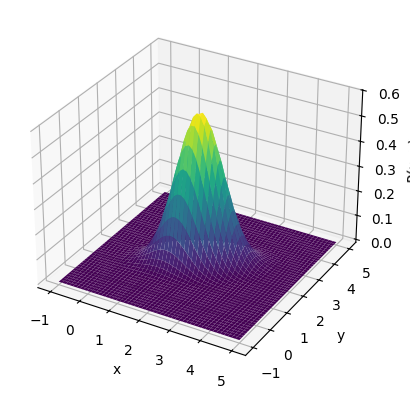

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Определяем область значений для x и y
x = np.linspace(-1, 5, 50)
y = np.linspace(-1, 5, 50)

# Создаем сетку координат
X, Y = np.meshgrid(x, y)

# Вычисляем значения функции
Z = (np.sqrt(14)/(2*np.pi))*np.exp((-1/2)*(3*X**2 - 4*X*Y + 6*Y**2 - 4*X - 16*Y + 20))

# Создаем 3D-график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.viridis)

# Настраиваем оси
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('P(x, y)')

# Отображаем график
plt.show()

### 2. Найти аффинное преобразование, переводящее исходный случайный вектор в стандартный нормальный.


$ 3x^2 - 4xy + 6y^2 - 4x - 16y + 20 = \cfrac{1}{3} (3x-2y-2)^2 + \cfrac{14}{3} (y-2)^2 = \left( \sqrt{3}x - \cfrac{2\sqrt{3}}{3}y - \cfrac{2\sqrt{3}}{3}\right)^2 + \left(\cfrac{\sqrt{42}}{3}y - \cfrac{2\sqrt{42}}{3}\right)^2 $

$ \left( \begin{matrix} 
\xi_{st} \\
\eta_{st}
\end{matrix} \right) = \left( \begin{matrix} 
\sqrt{3} & -\cfrac{2\sqrt{3}}{3}\\
0 & \cfrac{\sqrt{42}}{3}
\end{matrix} \right) \left( \begin{matrix} 
\xi \\
\eta
\end{matrix} \right) + \left( \begin{matrix} 
-\cfrac{2\sqrt{3}}{3} \\
-\cfrac{2\sqrt{42}}{3}
\end{matrix} \right)$

$ \vec{\eta} = A\vec{\xi} + b, \quad \vec{\xi} \sim \mathscr{N}(\mu, \Sigma), \quad \mathbb E \vec{\eta} = A\mu + b, \quad \mathbb D \vec{\eta} = A \Sigma A^{\intercal}$

$ \mathbb E \left( \begin{matrix} 
\xi_{st} \\
\eta_{st}
\end{matrix} \right) = \left( \begin{matrix} 
\sqrt{3} & -\cfrac{2\sqrt{3}}{3}\\
0 & \cfrac{\sqrt{42}}{3}
\end{matrix} \right) \left( \begin{matrix} 
2 \\
2
\end{matrix} \right) + \left( \begin{matrix} 
-\cfrac{2\sqrt{3}}{3} \\
-\cfrac{2\sqrt{42}}{3}
\end{matrix} \right) = \left( \begin{matrix} 
0 \\
0
\end{matrix} \right)$

$ \Sigma_{st} = \cfrac{1}{14} \left( \begin{matrix} 
\sqrt{3} & -\cfrac{2\sqrt{3}}{3}\\
0 & \cfrac{\sqrt{42}}{3}
\end{matrix} \right) \left( \begin{matrix} 
6 & 2\\
2 & 3
\end{matrix} \right) \left( \begin{matrix} 
\sqrt{3} & 0\\
-\cfrac{2\sqrt{3}}{3} & \cfrac{\sqrt{42}}{3}
\end{matrix} \right) = \left( \begin{matrix} 
1 & 0\\
0 & 1
\end{matrix} \right)$

### 3.Найти ортогональное преобразование, переводящеесоответствующий центрированный случайный векторв вектор с независимыми компонентами. Построить график плотности полученного распределения.



$ det(\Sigma^{-1} - \lambda E) = 0 \Longrightarrow \left( \begin{matrix} 
3-\lambda & -2\\
-2 & 6-\lambda
\end{matrix} \right)$

$ (3-\lambda)(6-\lambda) - 4 = \lambda^2 - 9\lambda + 14 = 0$

По теореме Виета: $ \quad \begin{matrix} 
\lambda_{1}+\lambda_{2}=9 \\
\lambda_{1}\cdot\lambda_{2}=14
\end{matrix} \quad \Longrightarrow \quad \begin{matrix} 
\lambda_1 = 2 \\
\lambda_2 = 7
\end{matrix} $

$ \vec{v_1} = \left( \begin{matrix} 
1 & -2 \\
-2 & 4
\end{matrix} \right) \quad \vec{v_2} = \left( \begin{matrix} 
-4 & -2 \\
-2 & -1
\end{matrix} \right) $

$ \vec{v_1} : \begin{cases} 
x-2y=0 \\
-2+4y=0
\end{cases} \quad \vec{v_1} = \alpha \left( \begin{matrix} 
2 \\
1
\end{matrix} \right) \quad \alpha = \cfrac{1}{\sqrt{5}} $

$ \vec{v_2} : \begin{cases} 
-4x-2y=0 \\
-2-y=0
\end{cases} \quad \vec{v_2} = \alpha \left( \begin{matrix} 
1 \\
-2
\end{matrix} \right) \quad \alpha = \cfrac{1}{\sqrt{5}} $

$ Q^{\intercal} = \cfrac{1}{\sqrt{5}} \left( \begin{matrix} 
2 & 1 \\
1 & -2
\end{matrix} \right) \quad \Longrightarrow \quad  Q = \cfrac{1}{\sqrt{5}} \left( \begin{matrix} 
2 & 1 \\
1 & -2
\end{matrix} \right)$

$ \Sigma_{id} = Q \Sigma Q^{\intercal} = \cfrac{1}{70} \left( \begin{matrix} 
2 & 1 \\
1 & -2
\end{matrix} \right) \left( \begin{matrix} 
6 & 2 \\
2 & 3
\end{matrix} \right) \left( \begin{matrix} 
2 & 1 \\
1 & -2
\end{matrix} \right) = \left( \begin{matrix} 
\cfrac{1}{2} & 0 \\
0 & \cfrac{1}{7}
\end{matrix} \right) \quad \Longrightarrow \quad \cfrac{1}{2} = \cfrac{1}{\lambda_1}; \quad \cfrac{1}{7} = \cfrac{1}{\lambda_2}$

Построим график плотности полученного распределения:

$ p_{\xi,\eta} (x,y) = \cfrac{\sqrt{14}}{2\pi} \cdot exp \left( -\cfrac{1}{2} \left( \cfrac{x^2}{7} + \cfrac{y^2}{2} \right) \right) $

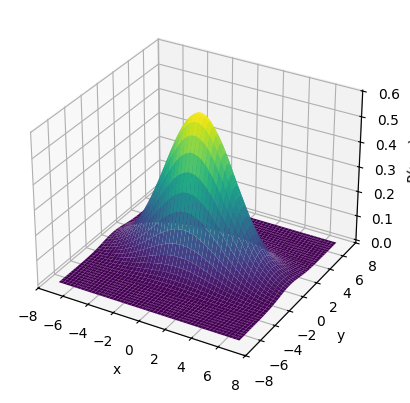

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Определяем область значений для x и y
x = np.linspace(-7, 7, 50)
y = np.linspace(-7, 7, 50)

# Создаем сетку координат
X, Y = np.meshgrid(x, y)

# Вычисляем значения функции
Z = (np.sqrt(14)/(2*np.pi))*np.exp((-1/2)*((X**2)/7 + (Y**2)/2))

# Создаем 3D-график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.viridis)

# Настраиваем оси
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('P(x, y)')

# Отображаем график
plt.show()

### 4. Вычислить характеристики совместного распределения случайного вектора $ (\xi - 4\eta, -\xi - 5\eta) $ изаписать его плотность. Построить график плотности полученного распределения.


$ {(\xi-4\eta, -\xi-5\eta)^{\intercal}} = 
\begin{pmatrix}
    1 & -4\\
    -1 & -5
\end{pmatrix} \begin{pmatrix}
    \xi\\
    \eta
\end{pmatrix} + \begin{pmatrix}
    0\\
    0
\end{pmatrix} $ 

Матрица $A$ невырожденная, т.к. $ \det A = -5-4=-9 \neq 0 $

$ \vec{\mu} = 
\begin{pmatrix}
    1 & -4\\
    -1 & -5
\end{pmatrix} \begin{pmatrix}
    2 \\
    2
\end{pmatrix} = \begin{pmatrix}
    -6 \\
    -12
\end{pmatrix};$

$\Sigma = \cfrac{1}{14} \begin{pmatrix}
     1 & -4\\
    -1 & -5
\end{pmatrix} \begin{pmatrix}
        6 & 2 \\
        2 & 3 
\end{pmatrix} \begin{pmatrix}
     1 & -1\\
    -4 & -5
\end{pmatrix} = \begin{pmatrix}
  \cfrac{19}{7} & \cfrac{26}{7} \\
  \cfrac{26}{7} & \cfrac{101}{14} \\ 
\end{pmatrix} $

$ \mathbb{D} \xi = \cfrac{19}{7} \quad \mathbb{D} \eta = \cfrac{101}{14} \quad \mathop{\mathrm{cov}}\nolimits(\xi, \eta) = \cfrac{26}{7} $

$ \rho (\xi, \eta) = \cfrac{26\sqrt{3838}}{1919} $

$ \det \Sigma = \cfrac{81}{14} $

$ \Sigma^{-1} = \cfrac{1}{81} 
\begin{pmatrix}
    101 & -52 \\
    -52 & 38
\end{pmatrix} $

Построим график плотности полученного распределения:

$ p_{\xi, \eta}  (x, y) = \cfrac{\sqrt{14}}{18\pi} \cdot \exp \left(-\cfrac{1}{2} \left(\cfrac{101}{81}x^2 - \cfrac{104}{81}xy + \cfrac{38}{81}y^2 - \cfrac{4}{9}x + \cfrac{32}{9}y + 20  \right)\right) $


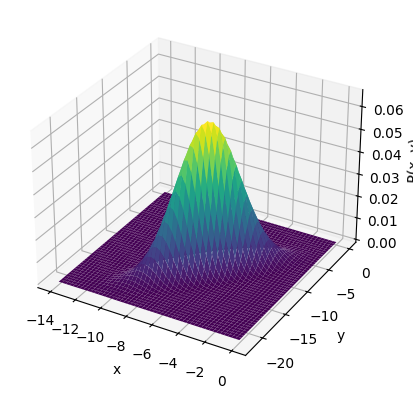

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Определяем область значений для x и y
x = np.linspace(-14, 0, 50)
y = np.linspace(-22, 0, 50)

# Создаем сетку координат
X, Y = np.meshgrid(x, y)

# Вычисляем значения функции
Z = (np.sqrt(14)/(18*np.pi))*np.exp((-1/2)*((101/81)*X**2 - (104/81)*X*Y + (38/81)*Y**2 - (4/9)*X + (32/9)*Y + 20))

# Создаем 3D-график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.viridis)

# Настраиваем оси
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('P(x, y)')

# Отображаем график
plt.show()

### 5. Найти условное распределение $ \xi $ при условии $ \eta $. Вычислить $ \mathbb E(\xi|\eta) $ и $ \mathbb D(\xi | \eta) $.


$ p_{\xi|\eta=y_0} (x) = \cfrac{\cfrac{\sqrt{14}}{2\pi} exp \left( -\cfrac{1}{2} (3x^2 - 4xy_0 + 6y_0^2 - 4x - 16y_0 + 20) \right)}{\cfrac{\sqrt{7}}{\sqrt{3\pi}} exp \left( - \cfrac{1}{2} \left(\cfrac{\sqrt{14}y_0-2\sqrt{14}}{\sqrt{3}}\right)^2 \right)} = \cfrac{\sqrt{6\pi}}{2\pi} exp \left( -\cfrac{1}{2} \left( \cfrac{x - \cfrac{2(y_0 - 1)}{3}}{\cfrac{1}{\sqrt{3}}} \right)^2 \right) $

$ \mathbb{D} (\xi|\eta) = \cfrac{2(y_0 - 1)}{3} \quad \mathbb{D} (\xi|\eta) = \left( \cfrac{1}{\sqrt{3}} \right)^2 = \cfrac{1}{3} $

## Выводы


В ходе выполнения данной практической работы были изучены многомерные распределения и их характеристики, построение графиков и работа в Jupyter Notebook. 